# Appropriate Format and Outlier Removal  
In this section, we convert both numerical and non-numerical columns to the appropriate format to avoid any challenges during analysis. We will also remove outliers, which include unusually expensive or cheap houses that are rarely observed.


In [2]:
import pandas as pd

housing_no_missing = pd.read_csv('housing_no_missing.csv', encoding='gbk')
housing_no_missing

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318814,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,中 5,2003,1,6,0.333,0.0,0.0,3
318815,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,中 24,2009,1,6,0.222,1.0,1.0,3
318816,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,中 7,2000,3,6,0.500,1.0,0.0,3
318817,116.501794,39.799347,2016-06-12,1.0,720.0,178.34,4,2,1,2,中 5,2003,4,2,0.500,0.0,0.0,3


# Appropriate Format for Categorical Values  
Some columns in the dataset contain categorical values, such as elevator, building material, and renovation condition. To improve data presentation, we convert these numeric values to their corresponding string representations.



<center>
<table>
<tr>
    <td><b><code>elevator</code></b></td>    
</tr>    
<tr>    
<td>1</td> <td>'has elevator'</td>
</tr>
<tr>     
<td>0</td> <td>'no elevator'</td>    
</tr>
</table>   

<br>       

<table>
<tr>
    <td><b><code>subway</code></b></td>    
</tr>        
<tr>    
<td>1</td> <td>'has subway'</td>
</tr>
<tr>     
<td>0</td> <td>'no subway'</td>    
</tr>        
</table>   
<br>        


<table>
<tr>
<td><b><code>buildingStructure</code></b></td>    
</tr>     
<tr>    
<td>1</td> <td>'unknown'</td>
</tr>
<tr>     
<td>2</td> <td>'mixed'</td>    
</tr>
            
<tr>     
<td>3</td> <td>'brick and wood' </td>    
</tr>
            
<tr>     
<td>4</td> <td>'concrete'</td>    
</tr>
            
<tr>     
<td>5</td> <td>'steel'</td>    
</tr>
            
<tr>     
<td>6</td> <td>'steel-concrete composite'</td>    
</tr>            
</table> 
<br>
        

<table>
<tr>
<td><b><code>renovationCondition</code></b></td>    
</tr>      
<tr>    
<td>1</td> <td>'other'</td>
</tr>
<tr>     
<td>2</td> <td>'rough'</td>    
</tr>
            
<tr>     
<td>3</td> <td>'Simplicity' </td>    
</tr>
            
<tr>     
<td>4</td> <td>'hardcover'</td>    
</tr>
                 
</table>

</center>

In [4]:
import numpy as np
housing_categorical = housing_no_missing.copy()

housing_categorical["elevator"] = np.where(housing_categorical["elevator"] == 1, "has elevator", "no elevator")
housing_categorical["subway"] = np.where(housing_categorical["subway"] == 1, "has subway", "no subway")
housing_categorical.replace({'buildingStructure':{ 1: 'unknown' ,2 : 'mixed',3: 'brick and wood' ,4 : 'concrete',5: 'steel' ,6 : 'steel-concrete composite'}},inplace=True)
housing_categorical.replace({'renovationCondition':{ 1: 'other' ,2 : 'rough',3: 'Simplicity' ,4 : 'hardcover'}},inplace=True)

housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


# Appropriate Format for Numerical Values  
Columns that contain string values are of type `Object`. Upon closer inspection, you may notice that some numerical columns are also stored as `object`. In the next step, we will convert these columns to numerical values.  

In [6]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

## Step 2: Handling Unknown Construction Year Values  
Take a look at the unique values in the `constructionTime` column. Some houses have a Chinese phrase indicating an unknown construction year. 

In [38]:
housing_construction = housing_categorical.copy()
housing_construction.drop(housing_construction.loc[housing_construction['constructionTime']=='未知'].index, inplace=True)
housing_construction['constructionTime'].astype(int)


housing_construction['constructionTime'] =housing_construction['constructionTime'].astype(int)
housing_construction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299536 entries, 0 to 318817
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  int64  
 7   drawingRoom          299536 non-null  int64  
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  int64  
 10  floor                299536 non-null  object 
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator             2

## Step 3: Handling the `floor` Column  
The `floor` column has a different structure. It contains a Chinese word followed by a number. The number after the Chinese character represents the floor height of the house.

In [40]:
housing_floor = housing_construction.copy()
housing_floor['floor'] = housing_floor['floor'].str.extract(r'(\d+)').astype(int)

housing_floor.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1


In [41]:
housing_floor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299536 entries, 0 to 318817
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  int64  
 7   drawingRoom          299536 non-null  int64  
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  int64  
 10  floor                299536 non-null  int32  
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator             2

## Step 4: Handling Outliers

In this step, we will focus on handling outliers. Outliers can be homes that are unusually large, expensive, or conversely, excessively cheap or small. These homes significantly deviate from the mean and can negatively impact data analysis. 
One of the best methods to identify and remove outliers is by using quartiles and box plots. Therefore, we will start by plotting a box plot for the `price` column to visualize any potential outliers.


<Axes: >

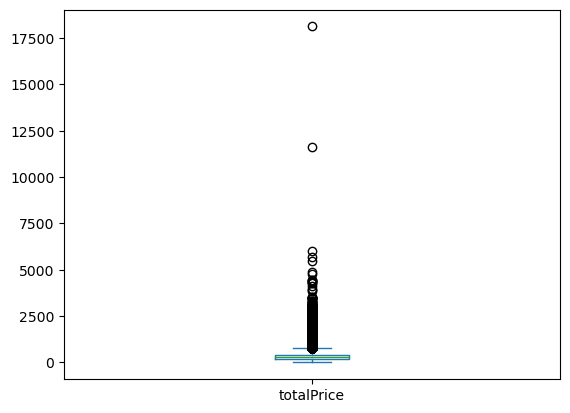

In [42]:
housing_floor.totalPrice.plot(kind = 'box')

## Step 5: Removing Extreme Outliers

Some data points are so extreme that the box plot extends far beyond the box! Points above the plot are considered extremely outlying data.


## Step 6: Removing Houses with Extreme Prices

In this step, we will remove the houses whose prices fall outside of the 1.5 IQR range. This means that houses whose prices are either too low or too high compared to the interquartile range will be removed.

In [46]:
Q1 = housing_floor['totalPrice'].quantile(.25)
Q3 = housing_floor['totalPrice'].quantile(.75)
IQR = Q3 - Q1
housing_no_outlier = housing_floor.drop(housing_floor[ (housing_floor.totalPrice < Q1-1.5*IQR) | (housing_floor.totalPrice> Q3+1.5*IQR)].index)

print('Number of removed outliers : ', housing_floor.shape[0] - housing_no_outlier.shape[0])
housing_no_outlier

Number of removed outliers :  14496


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
5,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318813,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3
318814,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3
318815,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3
318816,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3


<Axes: >

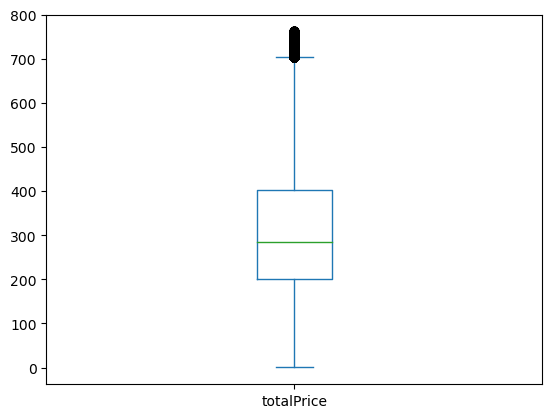

In [47]:
housing_no_outlier.totalPrice.plot(kind = 'box')

In [48]:
housing_no_outlier.to_csv('housing_no_outlier.csv', encoding='gbk', index=False)